In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import stdev
import scipy.stats as sp
import arch

In [2]:
copper = pd.read_csv('../data/copper.csv')
copper

,Date,Close/Last,Volume,Open,High,Low
0,04/14/2023,4.1065,98124,4.1285,4.1955,4.0950
1,04/13/2023,4.1240,88437,4.0700,4.1430,4.0535
2,04/12/2023,4.0810,88325,4.0295,4.0880,3.9840
3,04/11/2023,4.0195,81243,3.9870,4.0540,3.9780
4,04/10/2023,3.9765,53745,4.0180,4.0395,3.9630
...,...,...,...,...,...,...
1255,04/20/2018,3.1555,33960,3.1490,3.1685,3.1275
1256,04/19/2018,3.1540,37634,3.1835,3.2180,3.1350
1257,04/18/2018,3.1815,51721,3.1100,3.2015,3.0995
1258,04/17/2018,3.0795,88784,3.0835,3.1020,3.0545


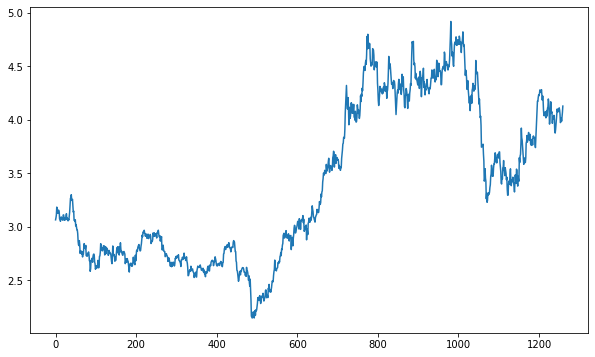

In [67]:
Y = np.array(copper.Open.values[::-1])

plt.figure(figsize=(10, 6))
plt.plot(Y)
plt.show()

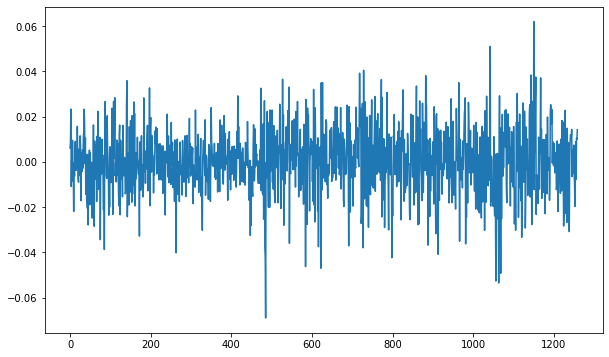

In [8]:
Y = np.array(copper.Open.values[::-1])
X = np.log(Y[1:] / Y[:-1])

plt.figure(figsize=(10, 6))
plt.plot(X)
plt.show()

In [333]:
np.quantile(X, 0.99)

0.035013291334181094

# GARCH

In [16]:
model = arch.arch_model(X, vol='GARCH', p=1, q=1)
results = model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.793793161627534e+17
Iteration:      2,   Func. Count:     17,   Neg. LLF: -3594.726449617
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3594.7264470748696
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3594.73
Distribution:                  Normal   AIC:                          -7181.45
Method:            Maximum Likelihood   BIC:                          -7160.90
                                        No. Observations:                 1259
Date:                Mon, Jun 05 2023   Df Residuals:                     1258
Time:        

c:\Users\szymo\AppData\Local\Programs\Python\Python38\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002032. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


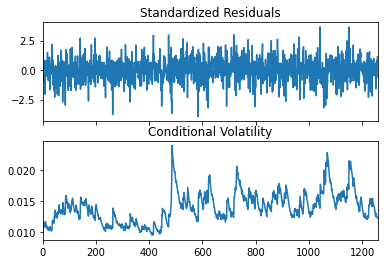

In [361]:
results.plot()
plt.show()

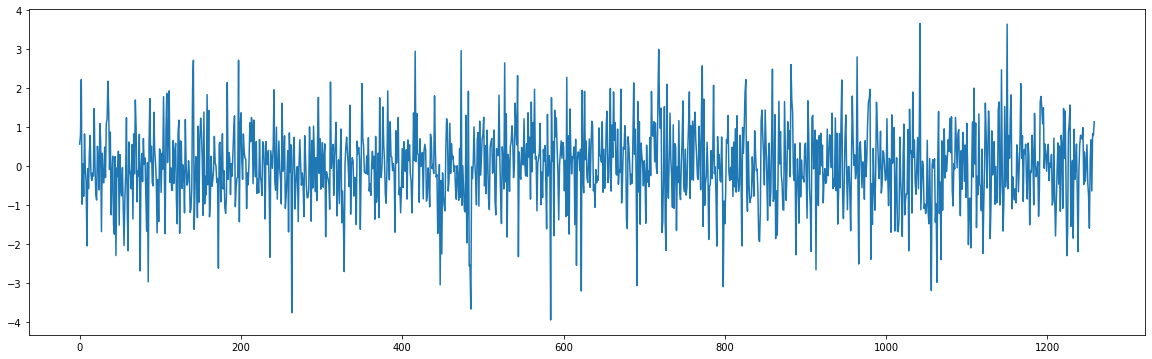

In [423]:
plt.figure(figsize=(20, 6))
plt.plot(results.std_resid)
plt.show()

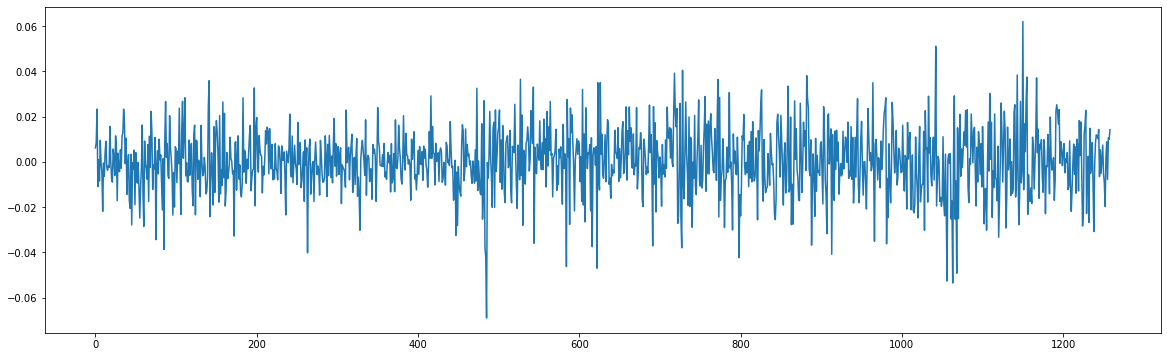

In [424]:
plt.figure(figsize=(20, 6))
plt.plot(X)
plt.show()

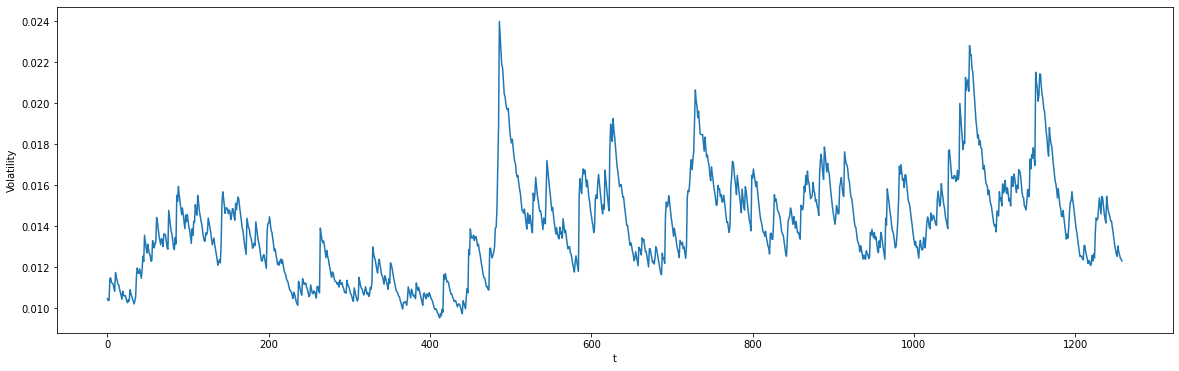

In [425]:
plt.figure(figsize=(20, 6))
plt.plot(results._volatility)
plt.xlabel("t")
plt.ylabel("Volatility")
plt.show()

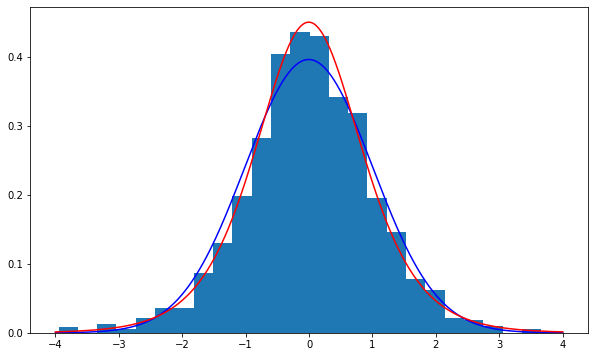

In [45]:
L = results.std_resid
plt.figure(figsize=(10, 6))
plt.hist(L, bins=25, density=True)
xs = np.linspace(-4, 4, 1000)
plt.plot(xs, sp.norm.pdf(xs, np.mean(L), np.std(L)), c='blue')
plt.plot(xs, sp.logistic.pdf(xs, np.mean(L), np.sqrt(3)/np.pi * np.std(L)), c='red')
plt.show()

In [444]:
print(float(np.quantile(L, 0.95) * np.sqrt(results.forecast().variance.iloc[-1])))
print(float(np.quantile(L, 0.99) * np.sqrt(results.forecast().variance.iloc[-1])))

0.0206246079470565
0.029678754009436713


In [449]:
results.forecast(horizon=30).variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.21,h.22,h.23,h.24,h.25,h.26,h.27,h.28,h.29,h.30
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [447]:
print(float(np.quantile(L, 0.95) * np.sqrt(results.forecast(horizon=30).variance.iloc[-1])))
print(float(np.quantile(L, 0.99) * np.sqrt(results.forecast(horizon=30).variance.iloc[-1])))

TypeError: cannot convert the series to <class 'float'>

# Geometrycznny ruch Browna

In [393]:
mu = np.mean(np.log(Y[1:] / Y[:-1]))
sigma = stdev(np.log(Y[1:] / Y[:-1]))

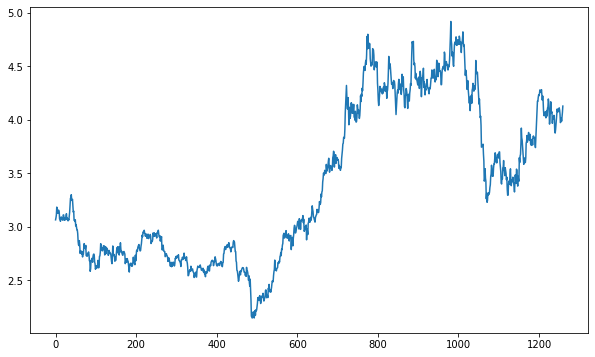

In [171]:
plt.figure(figsize=(10, 6))
plt.plot(Y)
plt.show()

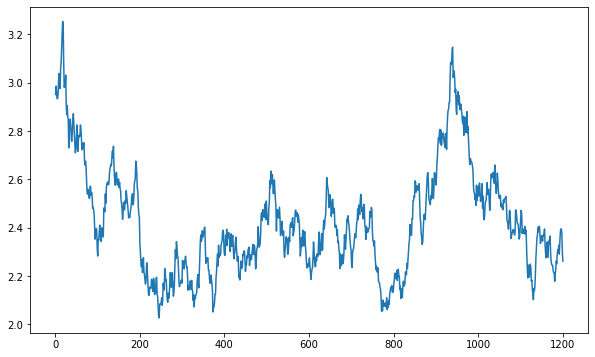

In [239]:
T = 1200
#S0 = Y[-1]
S0 = 3
n = 1000
ts = np.linspace(T/n, T, n)
Bt = np.cumsum(sp.norm.rvs(0, np.sqrt(T/n), n))
St = S0 * np.exp((mu - sigma**2 / 2) * ts + sigma * Bt)

plt.figure(figsize=(10, 6))
plt.plot(ts, St)
plt.show()

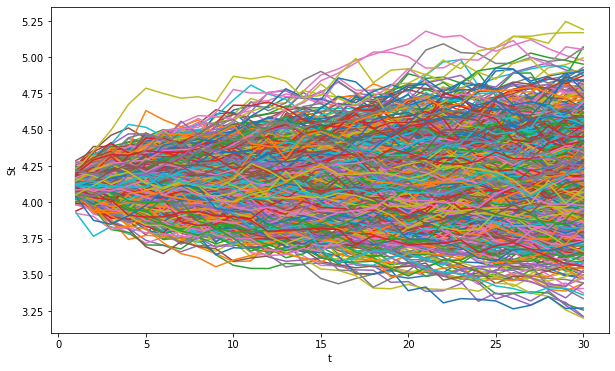

In [442]:
T = 30
S0 = Y[-1]
n = 30
ts = np.linspace(T/n, T, n)

plt.figure(figsize=(10, 6))
MC = 1000
St_table = np.zeros((n, MC))
for i in range(MC):
    Bt = np.cumsum(sp.norm.rvs(0, np.sqrt(T/n), n))
    St = S0 * np.exp((mu - sigma**2 / 2) * ts + sigma * Bt)
    St_table[:, i] = St
    plt.plot(ts, St)

plt.xlabel("t")
plt.ylabel("St")
plt.show()

In [411]:
T = 30
S0 = Y[-1]
n = 30
ts = np.linspace(T/n, T, n)

MC = 10000
St_table = np.zeros((n, MC))
for i in range(MC):
    Bt = np.cumsum(sp.norm.rvs(0, T/n, n))
    St = S0 * np.exp((mu - sigma**2 / 2) * ts + sigma * Bt)
    St_table[:, i] = St

print(np.quantile(St_table[-1,:], 0.95))
print(np.quantile(St_table[-1,:], 0.99))

4.712886202059042
4.94606037801797


In [415]:
loc = S0 * np.exp(mu * 30)
scale = S0**2 * np.exp(2 * mu * 30) * (np.exp(sigma**2 * 30) - 1)

print(sp.lognorm.ppf(0.95, s=1, loc=loc, scale=scale))
print(sp.lognorm.ppf(0.99, s=1, loc=loc, scale=scale))

4.706001778313526
5.241381013768554
